![picture](https://drive.google.com/uc?id=1g6CKfxXBbpiOPH9u6_s5obm5QHyK0C27)



![picture](https://drive.google.com/uc?id=1CMZynkTLrNZUFatYqce2gf4Z5nYM5CtR)

##Imports

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Load Data

In [0]:
client = pd.read_csv('/content/drive/My Drive/CLIENT.csv')
client_consom = pd.read_csv('/content/drive/My Drive/CLIENT_CONSOMMATION_UR62.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


##Split the Data

In [0]:
client_consom = pd.DataFrame(data= [x[0].split() for x in client_consom.values ] , columns =client_consom.iloc[0].index[0].split()+['unnamed'])

In [0]:
client = pd.DataFrame(data= [x[0].split() for x in client.values ] , columns =client.iloc[0].index[0].split())

##View the Data

In [0]:
client_consom.head()

,CF_AB_CODE,CF_AB_REF,CF_FACT_DATFACT,RC_BTTARIF_CODE,BT_CONSO_NUMCPTR,RC_BT_SCPTR_CODE,RC_CCPTEUR_CODE,RC_BT_ERLV_CODE,BT_CONSO_COEFF,BT_CONSO_CONSO1,BT_CONSO_CONSO2,BT_CONSO_CONSO3,BT_CONSO_CONSO4,BT_CONSO_AINDEX,BT_CONSO_NINDEX,BT_CONSO_NBRMOIS,unnamed
0,BT,253127000,04/05/2007,10,7665294,0,202,6,1,200,400,0,0,21400,22000,4,None
1,BT,253127000,29/08/2007,10,7665294,0,202,6,1,200,82,0,0,22000,22282,4,None
2,BT,253127000,05/05/2008,10,7665294,0,202,6,1,200,200,0,0,22700,23100,4,None
3,BT,253127000,02/01/2009,10,7665294,0,202,6,1,200,431,0,0,23641,24272,4,None
4,BT,253127000,05/05/2009,10,7665294,0,202,6,1,200,353,0,0,24272,24825,4,None


In [0]:
client.head()

,RC_UR_CODE,CF_AB_CODE,CF_AB_REF,RC_CATEG_CODE,RC_COMMUNE_CODE,CF_AB_DAT_CREATION,CF_AB_SOLDE_FINAL,CF_AB_MENSUALISE,CF_AB_RELANCE,FRAUDE
0,60,BT,000010010,11,0101,15/01/2009,299704,0,1,0
1,60,BT,000010020,11,0101,29/04/2014,0,0,0,0
2,60,BT,000110020,11,0101,23/12/2013,636432,0,1,0
3,60,BT,000110050,51,0101,08/10/2004,523661,0,0,0
4,60,BT,000110070,51,0101,08/10/2008,218691,0,0,0


##Data Processing

###client_consom

In [0]:
# Create new feature : GAS > 29 / ELECTRICITY IN [9,29]
def f(x):
  if int(x) > 29:
    return 1
  else:
    return 0

client_consom['counter_type'] = client_consom['RC_BTTARIF_CODE'].apply(f)

In [0]:
#Delete useless features
client_consom.drop(['CF_AB_CODE','RC_CCPTEUR_CODE','RC_BT_ERLV_CODE','unnamed','RC_BTTARIF_CODE'], axis = 1, inplace= True)

In [0]:
# view missing data
total = client_consom.isnull().sum().sort_values(ascending=False)
percent = (client_consom.isnull().sum()/client_consom.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(11)

,Total,Percent
BT_CONSO_NBRMOIS,341,0.000325
BT_CONSO_NINDEX,341,0.000325
BT_CONSO_AINDEX,341,0.000325
BT_CONSO_CONSO4,341,0.000325
BT_CONSO_CONSO3,341,0.000325
BT_CONSO_CONSO2,341,0.000325
BT_CONSO_CONSO1,341,0.000325
BT_CONSO_COEFF,28,0.000027
RC_BT_SCPTR_CODE,28,0.000027
BT_CONSO_NUMCPTR,28,0.000027


In [0]:
#Drop nan values
client_consom.dropna(axis = 0, inplace= True)

In [0]:
#change type of some variables
client_consom.BT_CONSO_NINDEX = client_consom.BT_CONSO_NINDEX.astype(int)
client_consom.BT_CONSO_AINDEX = client_consom.BT_CONSO_AINDEX.astype(int)

In [0]:
#create new variable consumption
client_consom['consumption'] = client_consom.BT_CONSO_NINDEX - client_consom.BT_CONSO_AINDEX

In [0]:
#Delete those two variables after creating the variable consumption
client_consom.drop(['BT_CONSO_NINDEX','BT_CONSO_AINDEX' ], axis = 1, inplace= True)

In [0]:
# change the names of the variables to get better understanding of the variables
cols0 = ['client_id', 'invoice_date',
         'counter_number','counter_statue','counter_coefficient',
         'consommation_level_1','consommation_level_2',
         'consommation_level_3','consommation_level_4','months_number','counter_type', 'consumption']

client_consom.columns = cols0

In [0]:
#Extract the year and the month and delete the variable
client_consom['invoice_date'] = pd.to_datetime(client_consom['invoice_date'])
client_consom['year'] = client_consom['invoice_date'].dt.year
client_consom['month'] = client_consom['invoice_date'].dt.month
client_consom.drop('invoice_date', axis = 1, inplace= True)

In [0]:
client_consom.counter_statue.value_counts()

0         1018372
1           18935
5            8405
COFFRE       1090
COF           734
4             265
3             180
C             110
COFR           85
2              13
COFRE          10
cof            10
cofr            9
coffr           8
769             6
coof            2
Name: counter_statue, dtype: int64

In [0]:
# delete unknown data
client_consom = client_consom[client_consom.counter_statue != 'cof']
client_consom = client_consom[client_consom.counter_statue != 'cofr']
client_consom = client_consom[client_consom.counter_statue != 'coffr']
client_consom = client_consom[client_consom.counter_statue != '769']
client_consom = client_consom[client_consom.counter_statue != 'coof']
client_consom = client_consom[client_consom.counter_statue != 'COF']
client_consom = client_consom[client_consom.counter_statue != 'COFR']
client_consom = client_consom[client_consom.counter_statue != 'COFRE']
client_consom = client_consom[client_consom.counter_statue != 'C']
client_consom = client_consom[client_consom.counter_statue != 'COFFRE']

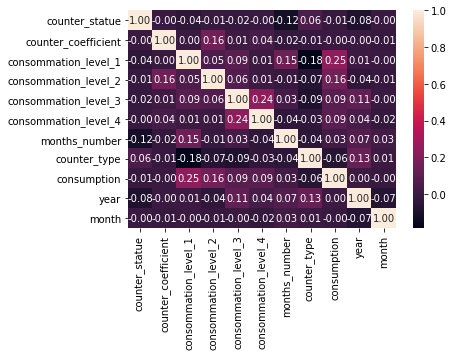

In [0]:
# change the type of variables to integer
for i in ['consumption','counter_type','counter_coefficient','counter_statue', 
          'consommation_level_1','consommation_level_2', 'consommation_level_3', 'consommation_level_4','months_number']:
  client_consom[i]=client_consom[i].apply(int)

# Plot the heatmap to see correlation between variables
corr=client_consom.corr()
sns.heatmap(corr, annot=True, fmt='0.2f')


#as we can see there's poor correlation between variables

Text(0.5, 1.0, 'consommation_level_4')

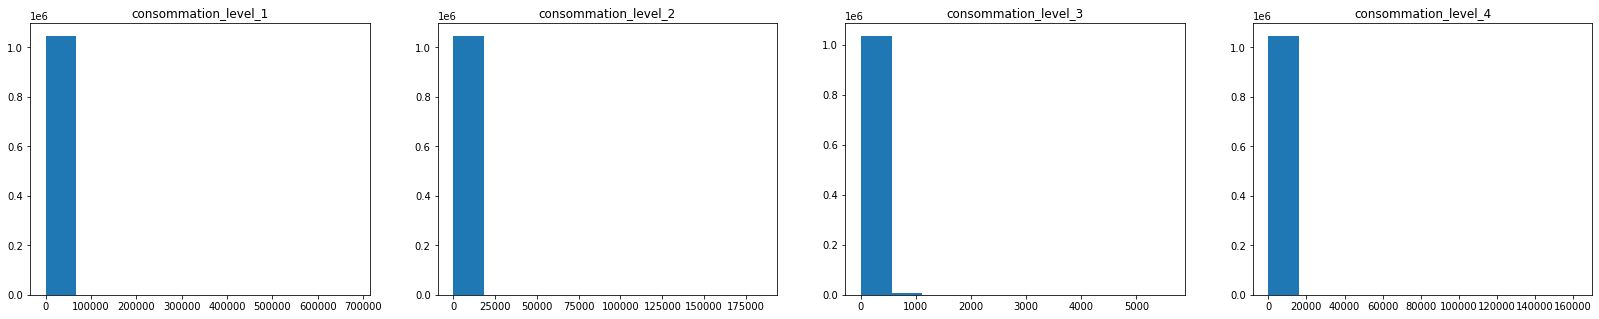

In [0]:
plt.figure(figsize=(28, 5))
plt.subplot(1, 4, 1)
plt.hist(client_consom.consommation_level_1)
plt.title('consommation_level_1')
plt.subplot(1, 4, 2)
plt.hist(client_consom.consommation_level_2)
plt.title('consommation_level_2')
plt.subplot(1, 4, 3)
plt.hist(client_consom.consommation_level_3)
plt.title('consommation_level_3')
plt.subplot(1, 4, 4)
plt.hist(client_consom.consommation_level_4)
plt.title('consommation_level_4')

# as we can see here, most of the consommation level are 0 or near 0
# for each level of consommation we can notice the existing of few huge values
#we can consider those big values as outliers : related to the overconsommation

In [0]:
client_consom.counter_coefficient.value_counts()
# it is clear that 99% of counter_coefficients are 1. So this variable is useless

1    1045962
2        123
3         82
0          3
Name: counter_coefficient, dtype: int64

In [0]:
client_consom.head(3)

,client_id,counter_number,counter_statue,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,months_number,counter_type,consumption,year,month
0,253127000,7665294,0,1,200,400,0,0,4,0,600,2007,4
1,253127000,7665294,0,1,200,82,0,0,4,0,282,2007,8
2,253127000,7665294,0,1,200,200,0,0,4,0,400,2008,5


###client

In [0]:
#drop useless variables
client.drop(['CF_AB_CODE','CF_AB_SOLDE_FINAL','CF_AB_MENSUALISE','CF_AB_RELANCE','CF_AB_DAT_CREATION'], axis = 1, inplace= True)

In [0]:
## change the names of the variables to get better understanding of the variables
cols1 = ['district', 'client_id','client_catg','region','target']
client.columns = cols1

In [0]:
# view missing data
total = client.isnull().sum().sort_values(ascending=False)
percent = (client.isnull().sum()/client.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(11)

,Total,Percent
target,165597,0.241193
region,0,0.000000
client_catg,0,0.000000
client_id,0,0.000000
district,0,0.000000


In [0]:
# drop the missing data in the target
client.dropna(inplace=True)

In [0]:
# view the categories of the target 
client.target.value_counts()

0    510125
1     10762
2        67
3        25
Name: target, dtype: int64

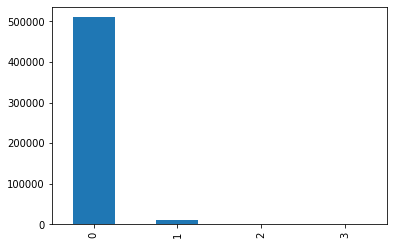

In [0]:
client['target'].value_counts().plot(kind='bar')

#from this plot we can notice that the data is highly umbalanced
# we have to apply the techniques that we learnt in the class during the modeling
# to get good results

In [0]:
# catogories =  1 : ELECTRICITY / 2 : GAS / 3 : ELECTRICITY & GAS
# drop the observations of 2 & 3
client = client[client.target != '2']
client = client[client.target != '3']

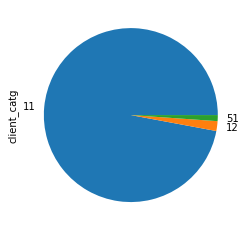

In [0]:
#plot the client_catg
client['client_catg'].value_counts().plot(kind='pie')

# as we can see that most of the client are ordinary

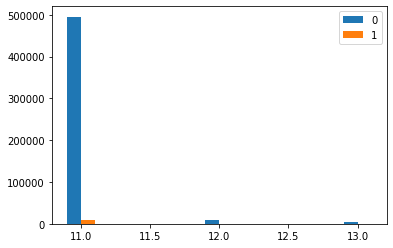

In [0]:
#let's see the number of fraudulent invoice in each category of clients

x=np.array([11,12,13])
y1=[client[client.client_catg=='11']['target'].value_counts()[0],client[client.client_catg=='12']['target'].value_counts()[0],client[client.client_catg=='51']['target'].value_counts()[0]]
y2=[client[client.client_catg=='11']['target'].value_counts()[1],client[client.client_catg=='12']['target'].value_counts()[1],client[client.client_catg=='51']['target'].value_counts()[1]]
width=0.1
plt.bar(x - width/2, y1, width, label='0')
plt.bar(x + width/2, y2, width, label='1')
plt.legend()

Text(0.5, 1.0, 'region')

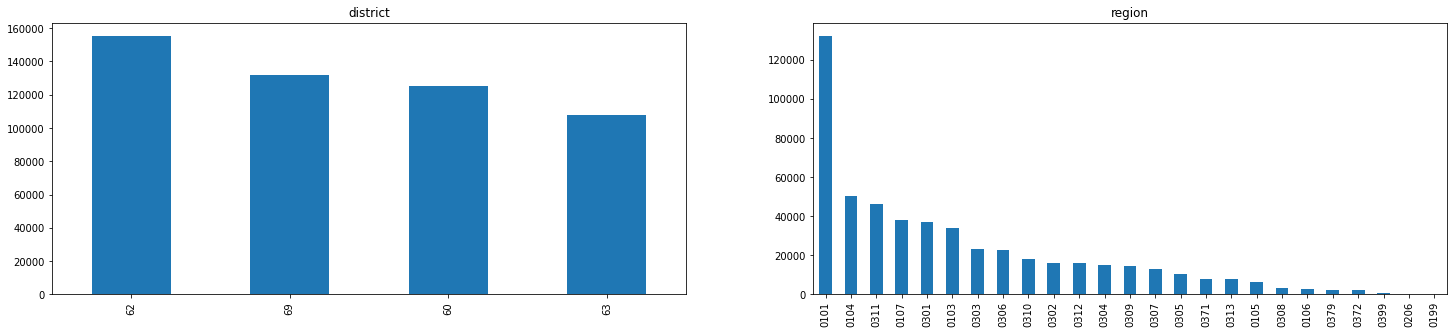

In [0]:
plt.figure(figsize=(25, 5))
plt.subplot(1,2,1)
client['district'].value_counts().plot(kind='bar')
plt.title('district')
plt.subplot(1,2,2)
client['region'].value_counts().plot(kind='bar')
plt.title('region')

# we see that there's a lot of district and region
# but you will see after joing the two dataset the majority of our clients come from the same district and region

### prepare data for the join

Now, we will do some transformation on the client_consom dataframe to make it ready for the join with the client dataframe.

In [0]:
client.head(3)

,district,client_id,client_catg,region,target
0,60,000010010,11,0101,0
1,60,000010020,11,0101,0
2,60,000110020,11,0101,0


In [0]:
client_consom.head(3)

,client_id,counter_number,counter_statue,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,months_number,counter_type,consumption,year,month
0,253127000,7665294,0,1,200,400,0,0,4,0,600,2007,4
1,253127000,7665294,0,1,200,82,0,0,4,0,282,2007,8
2,253127000,7665294,0,1,200,200,0,0,4,0,400,2008,5


In [0]:
#Cast the counter_number to not facing some problems during the join
client_consom.counter_number = client_consom.counter_number.astype(str)

In [0]:
#Applying statistical operations to all the observations grouped by the counter_number and creating new unique features to each counter
new=client_consom.groupby('counter_number')['counter_statue'].agg([np.min, np.mean, np.median, np.max, np.std, np.var, np.sum])
new.columns = ['counter_statue_min','counter_statue_mean','counter_statue_median','counter_statue_max', 'counter_statue_std', 'counter_statue_var', 'counter_statue_sum']
client_consom = pd.merge(client_consom,new,how='left',left_on='counter_number',right_on='counter_number')

new=client_consom.groupby('counter_number')['consommation_level_1'].agg([np.min, np.mean, np.median, np.max, np.std, np.var, np.sum])
new.columns = ['consommation_level_1_min','consommation_level_1_mean','consommation_level_1_median','consommation_level_1_max', 'consommation_level_1_std', 'cconsommation_level_1_var', 'consommation_level_1_sum']
client_consom = pd.merge(client_consom,new,how='left',left_on='counter_number',right_on='counter_number')

new=client_consom.groupby('counter_number')['consommation_level_2'].agg([np.min, np.mean, np.median, np.max, np.std, np.var, np.sum])
new.columns = ['consommation_level_2_min','consommation_level_2_mean','consommation_level_2_median','cconsommation_level_2_max', 'consommation_level_2_std', 'consommation_level_2_var', 'consommation_level_2_sum']
client_consom = pd.merge(client_consom,new,how='left',left_on='counter_number',right_on='counter_number')

new=client_consom.groupby('counter_number')['consommation_level_3'].agg([np.min, np.mean, np.median, np.max, np.std, np.var, np.sum])
new.columns = ['consommation_level_3_min','consommation_level_3_mean','consommation_level_3_median','consommation_level_3_max', 'consommation_level_3_std', 'consommation_level_3_var', 'consommation_level_3_sum']
client_consom = pd.merge(client_consom,new,how='left',left_on='counter_number',right_on='counter_number')

new=client_consom.groupby('counter_number')['consommation_level_4'].agg([np.min, np.mean, np.median, np.max, np.std, np.var, np.sum])
new.columns = ['consommation_level_4_min','consommation_level_4_mean','consommation_level_4_median','consommation_level_4_max', 'consommation_level_4_std', 'consommation_level_4_var', 'consommation_level_4_sum']
client_consom = pd.merge(client_consom,new,how='left',left_on='counter_number',right_on='counter_number')

new=client_consom.groupby('counter_number')['months_number'].agg([np.min, np.mean, np.median, np.max, np.std, np.var, np.sum])
new.columns = ['cmonths_number_min','months_number_mean','months_number_median','months_number_max', 'months_number_std', 'months_number_var', 'months_number_sum']
client_consom = pd.merge(client_consom,new,how='left',left_on='counter_number',right_on='counter_number')

new=client_consom.groupby('counter_number')['counter_type'].agg([np.min, np.mean, np.median, np.max, np.std, np.var, np.sum])
new.columns = ['counter_type_min','counter_type_mean','counter_type_median','counter_type_max', 'counter_type_std', 'counter_type_var', 'counter_type_sum']
client_consom = pd.merge(client_consom,new,how='left',left_on='counter_number',right_on='counter_number')

new=client_consom.groupby('counter_number')['consumption'].agg([np.min, np.mean, np.median, np.max, np.std, np.var, np.sum])
new.columns = ['consumption_min','consumption_mean','consumption_median','consumption_max', 'consumption_std', 'consumption_var', 'consumption_sum']
client_consom = pd.merge(client_consom,new,how='left',left_on='counter_number',right_on='counter_number')

new=client_consom.groupby('counter_number')['year'].agg([np.min, np.mean, np.median, np.max, np.std, np.var, np.sum])
new.columns = ['year_min','year_mean','year_median','year_max', 'year_std', 'year_var', 'year_sum']
client_consom = pd.merge(client_consom,new,how='left',left_on='counter_number',right_on='counter_number')

new=client_consom.groupby('counter_number')['month'].agg([np.min, np.mean, np.median, np.max, np.std, np.var, np.sum])
new.columns = ['month_min','month_mean','month_median','month_max', 'month_std', 'month_var', 'month_sum']
client_consom = pd.merge(client_consom,new,how='left',left_on='counter_number',right_on='counter_number')

In [0]:
#Fill nans with 0
client_consom.fillna(0, inplace= True)

In [0]:
#Drop original features after creating new unique features to each counter
client_consom.drop(['counter_statue','counter_coefficient','consommation_level_1','consommation_level_2','consommation_level_3','consommation_level_4','months_number','counter_type','consumption','month','year'], axis = 1, inplace = True)


In [0]:
client_consom.head(3)

,client_id,counter_number,counter_statue_min,counter_statue_mean,counter_statue_median,counter_statue_max,counter_statue_std,counter_statue_var,counter_statue_sum,consommation_level_1_min,consommation_level_1_mean,consommation_level_1_median,consommation_level_1_max,consommation_level_1_std,cconsommation_level_1_var,consommation_level_1_sum,consommation_level_2_min,consommation_level_2_mean,consommation_level_2_median,cconsommation_level_2_max,consommation_level_2_std,consommation_level_2_var,consommation_level_2_sum,consommation_level_3_min,consommation_level_3_mean,consommation_level_3_median,consommation_level_3_max,consommation_level_3_std,consommation_level_3_var,consommation_level_3_sum,consommation_level_4_min,consommation_level_4_mean,consommation_level_4_median,consommation_level_4_max,consommation_level_4_std,consommation_level_4_var,consommation_level_4_sum,cmonths_number_min,months_number_mean,months_number_median,months_number_max,months_number_std,months_number_var,months_number_sum,counter_type_min,counter_type_mean,counter_type_median,counter_type_max,counter_type_std,counter_type_var,counter_type_sum,consumption_min,consumption_mean,consumption_median,consumption_max,consumption_std,consumption_var,consumption_sum,year_min,year_mean,year_median,year_max,year_std,year_var,year_sum,month_min,month_mean,month_median,month_max,month_std,month_var,month_sum
0,253127000,7665294,0,0.5,0.0,5,1.581139,2.5,5,175,197.5,200.0,200,7.905694,62.5,1975,0,305.9,329.0,717,199.92468,39969.877778,3059,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0,0.0,0.0,0,2,3.8,4.0,4,0.632456,0.4,38,0,0.0,0.0,0,0.0,0.0,0,175,503.4,529.0,917,204.283681,41731.822222,5034,2006,2007.8,2008.0,2009,1.032796,1.066667,20078,2,4.6,4.5,8,2.633122,6.933333,46
1,253127000,7665294,0,0.5,0.0,5,1.581139,2.5,5,175,197.5,200.0,200,7.905694,62.5,1975,0,305.9,329.0,717,199.92468,39969.877778,3059,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0,0.0,0.0,0,2,3.8,4.0,4,0.632456,0.4,38,0,0.0,0.0,0,0.0,0.0,0,175,503.4,529.0,917,204.283681,41731.822222,5034,2006,2007.8,2008.0,2009,1.032796,1.066667,20078,2,4.6,4.5,8,2.633122,6.933333,46
2,253127000,7665294,0,0.5,0.0,5,1.581139,2.5,5,175,197.5,200.0,200,7.905694,62.5,1975,0,305.9,329.0,717,199.92468,39969.877778,3059,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0,0.0,0.0,0,2,3.8,4.0,4,0.632456,0.4,38,0,0.0,0.0,0,0.0,0.0,0,175,503.4,529.0,917,204.283681,41731.822222,5034,2006,2007.8,2008.0,2009,1.032796,1.066667,20078,2,4.6,4.5,8,2.633122,6.933333,46


In [0]:
#After droping original features, all the observations related to a specific counter are equal
#So drop duplicates and keep one observation per counter
client_consom.drop_duplicates(inplace= True, ignore_index= True)

In [0]:
#Some deeper preprocessing and cleaning
client_consom = client_consom[client_consom.counter_number != 'FICTIF']
client_consom = client_consom[client_consom.counter_number != 'FICT']
client_consom = client_consom[client_consom.counter_number != 'fictif']
client_consom = client_consom[client_consom.counter_number != 'J']
client_consom = client_consom[client_consom.counter_number != 'J/C']
client_consom = client_consom[client_consom.counter_number != 'Fictif']
client_consom = client_consom[client_consom.counter_number != 'jc']
client_consom = client_consom[client_consom.counter_number != 'j/c']
client_consom = client_consom[client_consom.counter_number != 'fitif']
client_consom = client_consom[client_consom.counter_number != 'fioctif']
client_consom = client_consom[client_consom.counter_number != 'fict']
client_consom = client_consom[client_consom.counter_number != 'ficif']
client_consom = client_consom[client_consom.counter_number != 'fectif']
client_consom = client_consom[client_consom.counter_number != '/COFFRET']
client_consom = client_consom[client_consom.counter_number != 'J.COFF']

In [0]:
# merge the two datasets via the client_id variable
train = pd.merge(client, client_consom, on='client_id', how='right')

In [0]:
#Drop nans created after joining
train.dropna(inplace= True)

In [0]:
train.region.value_counts()
# it is clear that 99% of regions are 0301. So this variable is useless

0301    46508
0302       42
0303        5
Name: region, dtype: int64

In [0]:
train.district.value_counts()
# it is clear that 100% of districts are 62. So this variable is useless

62    46555
Name: district, dtype: int64

In [0]:
#Drop useless varibales
train.drop(['district', 'region'], axis = 1, inplace = True)

In [0]:
#We created 70 new features
print(train.shape)

(46555, 74)


In [0]:
#Set the counter_number as index cuz we are going to make classification on it
train.set_index('counter_number', inplace = True)

In [0]:
train.target.value_counts()
# It's clear that our data is highly umbalaced
#So we will be doing some techniques to handle this problem

0    45801
1      754
Name: target, dtype: int64

In [0]:
#Cast the target to integer
train.target= train.target.astype(int)
#Cast the client_catg to integer
train.client_catg = train.client_catg.astype(int)

###Add data with target = 1

We extracted rows with target = 1 from the other datasets to make the data a bit balanced

In [0]:
train = train.reset_index()
train_1 = pd.read_csv('/content/drive/My Drive/Target_1.csv')
train = pd.concat([train,train_1])
train = train.sample(frac=1).set_index('counter_number')
train.head()

,client_id,client_catg,target,counter_statue_min,counter_statue_mean,counter_statue_median,counter_statue_max,counter_statue_std,counter_statue_var,counter_statue_sum,consommation_level_1_min,consommation_level_1_mean,consommation_level_1_median,consommation_level_1_max,consommation_level_1_std,cconsommation_level_1_var,consommation_level_1_sum,consommation_level_2_min,consommation_level_2_mean,consommation_level_2_median,cconsommation_level_2_max,consommation_level_2_std,consommation_level_2_var,consommation_level_2_sum,consommation_level_3_min,consommation_level_3_mean,consommation_level_3_median,consommation_level_3_max,consommation_level_3_std,consommation_level_3_var,consommation_level_3_sum,consommation_level_4_min,consommation_level_4_mean,consommation_level_4_median,consommation_level_4_max,consommation_level_4_std,consommation_level_4_var,consommation_level_4_sum,cmonths_number_min,months_number_mean,months_number_median,months_number_max,months_number_std,months_number_var,months_number_sum,counter_type_min,counter_type_mean,counter_type_median,counter_type_max,counter_type_std,counter_type_var,counter_type_sum,consumption_min,consumption_mean,consumption_median,consumption_max,consumption_std,consumption_var,consumption_sum,year_min,year_mean,year_median,year_max,year_std,year_var,year_sum,month_min,month_mean,month_median,month_max,month_std,month_var,month_sum
counter_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8634518,253381000,11,0,0,0.000000,0.0,0,0.000000,0.000000,0,0,508.937500,496.5,1163,339.091820,114983.262500,8143,0,0.000000,0.0,0,0.000000,0.000000,0,0,0.000000,0.0,0,0.000000,0.000000,0,0,0.000000,0.0,0,0.000000,0.000000,0,4,4.750000,4.0,12,2.175623,4.733333,76,0,0.0,0.0,0,0.0,0.0,0,0,508.937500,496.5,1163,339.091820,1.149833e+05,8143,2006,2008.750000,2008.5,2013,2.175623,4.733333,32140,3,7.625000,8.0,12,3.030402,9.183333,122
64137,254496500,11,0,0,0.000000,0.0,0,0.000000,0.000000,0,21,168.392857,146.0,407,108.939106,11867.728836,4715,0,0.000000,0.0,0,0.000000,0.000000,0,0,0.000000,0.0,0,0.000000,0.000000,0,0,0.000000,0.0,0,0.000000,0.000000,0,2,4.214286,4.0,8,1.133893,1.285714,118,0,0.0,0.0,0,0.0,0.0,0,21,168.392857,146.0,407,108.939106,1.186773e+04,4715,2005,2011.000000,2011.0,2017,3.485419,12.148148,56308,1,5.607143,5.5,12,3.034850,9.210317,157
4238192,215884890,11,1,0,0.000000,0.0,0,0.000000,0.000000,0,9,324.818182,183.0,1395,346.629298,120151.870130,7146,0,0.000000,0.0,0,0.000000,0.000000,0,0,0.000000,0.0,0,0.000000,0.000000,0,0,0.000000,0.0,0,0.000000,0.000000,0,2,4.545455,4.0,10,1.765470,3.116883,100,1,1.0,1.0,1,0.0,0.0,22,9,324.818182,183.0,1395,346.629298,1.201519e+05,7146,2011,2014.909091,2015.0,2019,2.328071,5.419913,44328,1,7.272727,8.0,12,3.119552,9.731602,160
12558,257744161,11,0,0,0.111111,0.0,1,0.323381,0.104575,2,0,180.944444,107.0,663,201.081626,40433.820261,3257,0,0.000000,0.0,0,0.000000,0.000000,0,0,0.000000,0.0,0,0.000000,0.000000,0,0,0.000000,0.0,0,0.000000,0.000000,0,2,4.333333,4.0,8,1.414214,2.000000,78,1,1.0,1.0,1,0.0,0.0,18,0,180.944444,107.0,663,201.081626,4.043382e+04,3257,2013,2016.111111,2016.0,2019,1.906302,3.633987,36290,3,6.777778,7.0,11,3.490416,12.183007,122
181596,256142900,11,0,0,0.000000,0.0,0,0.000000,0.000000,0,400,1214.692308,939.0,3200,963.919031,929139.897436,15791,0,261.538462,0.0,1600,596.571401,355897.435897,3400,0,133.384615,0.0,1241,350.884724,123120.089744,1734,0,5.538462,0.0,72,19.969207,398.769231,72,2,5.538462,4.0,16,4.909436,24.102564,72,0,0.0,0.0,0,0.0,0.0,0,437,1615.153846,982.0,6041,1764.506864,3.113484e+06,20997,2005,2010.153846,2009.0,2018,4.119995,16.974359,26132,3,6.769231,7.0,12,3.394943,11.525641,88


In [0]:
train.target.value_counts()

0    45801
1     6307
Name: target, dtype: int64

#*Modeling/Evaluation*

In this section we will be presenting the supervised and unsupervised approachs with different machine learning models and deep learning implementations.

#Supervised Approach

In [0]:
#We just made this quick supervised approach to get a glance about the problem's results

In [0]:
# split training and testing datasets
y = train.target
train.drop(['client_id', 'target'], axis = 1, inplace= True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.2, random_state = 32, stratify=y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((41686, 71), (10422, 71), (41686,), (10422,))

####Data Resampling: SMOTETomek

In [0]:
#Create new datasets by resampling the number of samples in the minority and majority of classes
from collections import Counter
from imblearn.combine import SMOTETomek
X_resampled,y_resampled = SMOTETomek(random_state = 32).fit_sample(X_train.values,y_train.values.ravel())
print('Resampled training dataset shape %s' % Counter(y_resampled))

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Resampled training dataset shape Counter({0: 35468, 1: 35468})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


##Machine Learning Approach

In [0]:
#Create the models

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
pipelines = []
params = []
names = []
#Notice that we tried to balance the data via using the clf__class_weight parameter in the models

pipelines.append(Pipeline([('clf', LogisticRegression())])) ### LogisticRegression
params.append({'clf__penalty':['l2'],'clf__C':[1.0], 'clf__solver':['lbfgs'], 'clf__class_weight': ['balanced']})
names.append('LogisticRegression') 
pipelines.append(Pipeline([('clf', KNeighborsClassifier())])) ## KNeighborsClassifier
params.append({'clf__n_neighbors':[5],'clf__leaf_size':[30], 'clf__metric':['minkowski']})
names.append('KNeighborsClassifier') 
pipelines.append(Pipeline([('clf', DecisionTreeClassifier())])) ## DecisionTreeClassifier
params.append({'clf__max_features': [None], 'clf__min_samples_split': [2], 'clf__min_samples_leaf':[1],
              'clf__class_weight': ['balanced']})
names.append('DecisionTreeClassifier') 
pipelines.append(Pipeline([('clf', RandomForestClassifier())])) ## RandomForestClassifier
params.append({'clf__n_estimators':[100], 'clf__min_samples_leaf':[1],'clf__min_samples_split':[2],
               'clf__class_weight': ['balanced']})
names.append('RandomForestClassifier') 
pipelines.append(Pipeline([('clf', GradientBoostingClassifier())])) ## GradientBoostingClassifier
params.append({'clf__learning_rate': [0.1], 'clf__min_samples_split': [2],'clf__min_samples_leaf': [1],
               'clf__max_depth':[3],'clf__max_features':[None],'clf__subsample':[1.0],'clf__n_estimators':[100]
    })
names.append('GradientBoostingClassifier')
pipelines.append(Pipeline([('clf', XGBClassifier())])) ## XGBClassifier
params.append({'clf__learning_rate': [0.1],'clf__n_estimators':[100],'clf__min_child_weight': [1],'clf__gamma': [0],
               'clf__subsample': [1],'clf__colsample_bytree': [1],'clf__max_depth': [10]})
names.append('XGBClassifier')

In [0]:
#Fit the models
#Using StratifiedkFold can help in case of umbalanced data
#In case of umbalaced data, reliable metrics are f1_score, precision_recall_curve, auc.

from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score 
 
def model(pipeline, parameters, name, X, y):    
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=32)

    grid_obj = GridSearchCV(estimator=pipeline, param_grid=parameters, cv=cv, scoring='f1', n_jobs=-1)
    grid_obj.fit(X,y)  

    print(name, 'F1-measure:', grid_obj.best_score_)
    estimator = grid_obj.best_estimator_
    estimator.fit(X,y) # train on all training dataset
    return estimator 


estimators = []
for idx in range(0,len(pipelines)):    
    estimators.append(model(pipelines[idx], params[idx], names[idx], X_resampled, y_resampled))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression F1-measure: 0.4980720554624118


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


KNeighborsClassifier F1-measure: 0.8480877589088236
DecisionTreeClassifier F1-measure: 0.921520401261321
RandomForestClassifier F1-measure: 0.9572871628226869
GradientBoostingClassifier F1-measure: 0.9266149639425156


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


XGBClassifier F1-measure: 0.9585468151469293



Performance of LogisticRegression

Confusion matrix
 [[7813 1348]
 [ 916  345]] 

F1-measure 0.2335815842924848 

PR-AUC 0.19125865714438095

Performance of KNeighborsClassifier

Confusion matrix
 [[6566 2595]
 [ 670  591]] 

F1-measure 0.26579716662918823 

PR-AUC 0.2524695726588515

Performance of DecisionTreeClassifier

Confusion matrix
 [[8460  701]
 [ 569  692]] 

F1-measure 0.5214770158251696 

PR-AUC 0.5504719615574161

Performance of RandomForestClassifier

Confusion matrix
 [[8828  333]
 [ 543  718]] 

F1-measure 0.6211072664359861 

PR-AUC 0.680528198895309

Performance of GradientBoostingClassifier

Confusion matrix
 [[8678  483]
 [ 685  576]] 

F1-measure 0.4965517241379311 

PR-AUC 0.5034476596574485

Performance of XGBClassifier

Confusion matrix
 [[8943  218]
 [ 538  723]] 

F1-measure 0.656675749318801 

PR-AUC 0.743321482747505


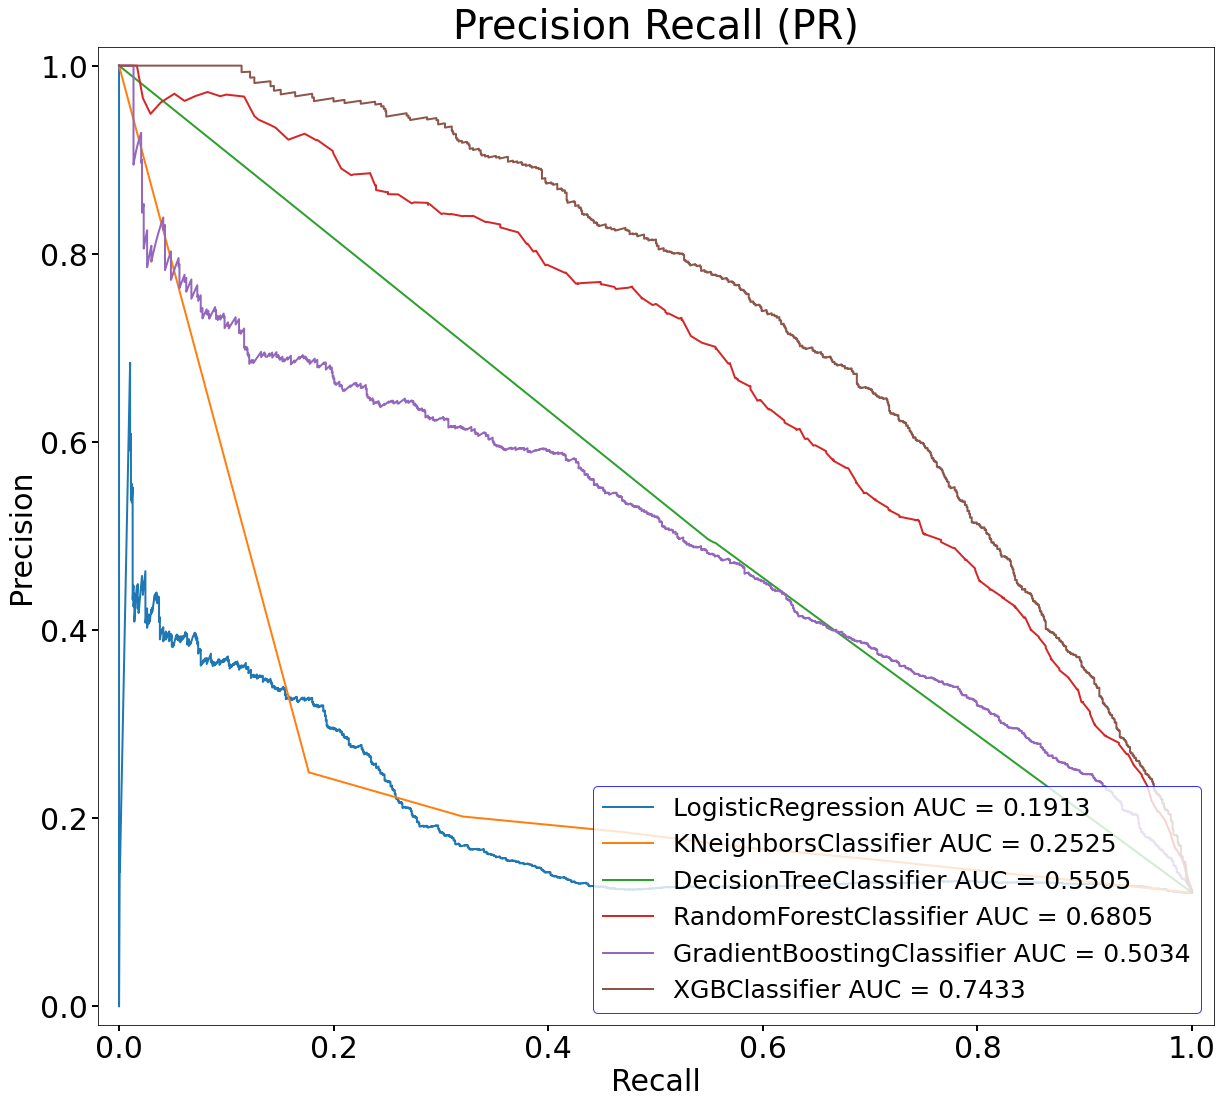

In [0]:
#Evaluate the model on unseen data

from sklearn.metrics import confusion_matrix, f1_score, precision_recall_curve, auc

def evaluate_models(estimators, names, X_test, y_test):
    # Plot PR curve for all my models
    fig, ax = plt.subplots(figsize=(20,18))    
    for idx, estimator in enumerate(estimators):
        print('\nPerformance of', names[idx])
        y_pred = estimator.predict(X_test)       
        print('\nConfusion matrix\n', confusion_matrix(y_test, y_pred), '\n')    
        print('F1-measure', f1_score(y_test, y_pred), '\n')    
 
        # calculate precision-recall curve
        precision, recall, thresholds = precision_recall_curve(y_test, estimator.predict_proba(X_test)[:,1]) 
        pr_auc = auc(recall, precision)
        print('PR-AUC', pr_auc)
        
        plt.plot(recall, precision, label = (names[idx] + ' AUC = %0.4f' % pr_auc),linewidth=2.0)
    
    #plot the results
    ax.grid(False)
    ax.tick_params(length=6, width=2, labelsize = 30, grid_color='r', grid_alpha=0.5)
    leg = plt.legend(loc = 'lower right',prop={'size': 25})
    leg.get_frame().set_edgecolor('b')
    plt.title('Precision Recall (PR)', FontSize=40)
    plt.xlim([-.02, 1.02])
    plt.ylim([-.02, 1.02])
    plt.ylabel('Precision',FontSize=30)
    plt.xlabel('Recall',FontSize=30)
    plt.show()

evaluate_models(estimators, names, X_test.values, y_test.values.reshape(-1,1))

From the plot and from the resutls we can notice that the XGBClassifier has the best performance for the supervised approach using machine learning methods.

##Deep Learning Approach

In [0]:
import tensorflow as tf
#define metrics
METRICS = [
    tf.keras.metrics.TruePositives(name='TP'),
    tf.keras.metrics.FalsePositives(name='FP'),
    tf.keras.metrics.TrueNegatives(name='TN'),
    tf.keras.metrics.FalseNegatives(name='FN'), 
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'), 
    tf.keras.metrics.AUC(curve='PR', name='PR-AUC'),
    ]

# define model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[-1],), kernel_initializer='he_normal',bias_initializer='zeros'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal', bias_initializer='zeros'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer='he_normal', bias_initializer='zeros')])

# define model compilation  
model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=METRICS)

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               9216      
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 17,537
Trainable params: 17,537
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Stop training when a monitored metric has stopped improving.
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_precision', 
    verbose=0,
    patience=2,
    mode='max',
    restore_best_weights=True)

BATCH_SIZE = 64

# Train the model
hist1 = model.fit(X_resampled, y_resampled, batch_size=BATCH_SIZE, epochs=10, verbose=1,callbacks=[early_stopping],
          validation_data=(X_test, y_test))

Epoch 1/10
1109/1109 [==============================] - 11s 10ms/step - loss: 128226.7500 - TP: 21484.0000 - FP: 19860.0000 - TN: 15600.0000 - FN: 13976.0000 - precision: 0.5196 - recall: 0.6059 - PR-AUC: 0.5151 - val_loss: 2710.8840 - val_TP: 755.0000 - val_FP: 5677.0000 - val_TN: 3484.0000 - val_FN: 506.0000 - val_precision: 0.1174 - val_recall: 0.5987 - val_PR-AUC: 0.1214
Epoch 2/10
1109/1109 [==============================] - 11s 10ms/step - loss: 20882.7441 - TP: 13122.0000 - FP: 12240.0000 - TN: 23220.0000 - FN: 22338.0000 - precision: 0.5174 - recall: 0.3701 - PR-AUC: 0.5121 - val_loss: 0.5103 - val_TP: 0.0000e+00 - val_FP: 0.0000e+00 - val_TN: 9161.0000 - val_FN: 1261.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_PR-AUC: 0.1210
Epoch 3/10
1109/1109 [==============================] - 11s 10ms/step - loss: 1786.7653 - TP: 3474.0000 - FP: 2863.0000 - TN: 32597.0000 - FN: 31986.0000 - precision: 0.5482 - recall: 0.0980 - PR-AUC: 0.5130 - val_loss: 0.6394 - val_TP:

As we can see here, thanks to early_stopping the model stopped at the 3 epochs and this helps avoiding the overfitting. We got a val_PR_AUC around 12% for the training.

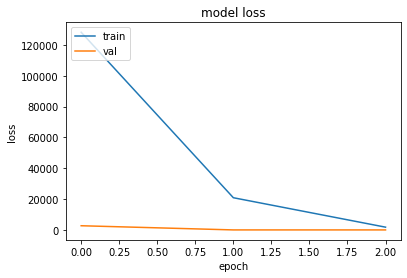

In [0]:
# summarize history for loss
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

We see here the evolution of the loss function with epochs, it's clear that the value of the loss decreases a lot in just 3 epochs to reach a value of 1786.

loss :  2710.884033203125
TP :  755.0
FP :  5677.0
TN :  3484.0
FN :  506.0
precision :  0.11738184094429016
recall :  0.5987311601638794
PR-AUC :  0.12143225967884064
F1-measure 0.1962823345898869


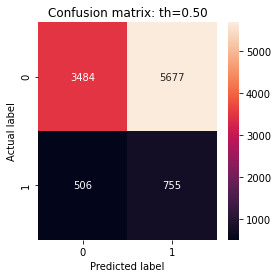

In [0]:
pred_probs_test = model.predict(X_test, batch_size=BATCH_SIZE)

#plot confusion matrix
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(4,4))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix: th={:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
    
results = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=0)

for name, value in zip(model.metrics_names, results):
    print(name, ': ', value)
print('F1-measure', f1_score(y_test, pred_probs_test>0.5)) 
plot_cm(y_test, pred_probs_test)

So after evalution the model we see that scores are 20% for the F1_score and 12% for the PR_AUC.
So compared to the machine learning approach it's clear that this approach performs poorly.

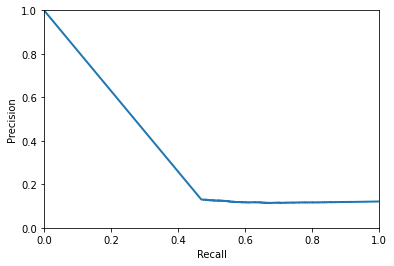

In [0]:
#plot PR curve
def plot_PR_curve(labels, predictions):
    precisions, recalls, _ = precision_recall_curve(labels, predictions)
    plt.plot(recalls, precisions, label='PR Curve', linewidth=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.xlim([0,1.0])
    plt.ylim([0,1.0])
    
plot_PR_curve(y_test, pred_probs_test)

so it's clear that the PR_AUC is under the 50% from the shape of the curve. Indeed, the curve is under the line with slope -1.

#Unsupervised Approach

###Machine Learning Approach

In [0]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
train = StandardScaler().fit_transform(train)
train = pd.DataFrame(train)

In [0]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from sklearn.metrics import confusion_matrix, f1_score




# outlier detectors to be compared
classifiers = {'Isolation Forest':IsolationForest(n_estimators=100, max_samples='auto', 
                                                  contamination='auto', max_features=1.0,
                                                  bootstrap=False, n_jobs=-1, behaviour='deprecated',
                                                  random_state=None, verbose=0, warm_start=False),     
             'Local Outlier Factor': LocalOutlierFactor(n_neighbors=20, algorithm='auto', leaf_size=30,
                                                        metric='minkowski', p=2, metric_params=None,
                                                        contamination='auto', novelty=False, n_jobs=-1),
             'DBSCAN':DBSCAN(eps=1.5, min_samples=5, metric='euclidean', 
                             metric_params=None, algorithm='auto', leaf_size=30,
                             p=None, n_jobs=-1)}
             
for (clf_name, clf) in classifiers.items():
    
    # fit and predict labels 
    y_pred = clf.fit_predict(train)   
      
    # Reshape the prediction values to 0 for valid, 1 for fraud. 
    y_pred[y_pred != -1] = 0
    y_pred[y_pred == -1] = 1 
        
    # classification metrics
    print(clf_name)
    print('Confusion Matrix\n', confusion_matrix(y, y_pred))  
    print('F1-score', f1_score(y, y_pred)) 

Isolation Forest
Confusion Matrix
 [[44162  1639]
 [ 5555   752]]
F1-score 0.17291331340538055
Local Outlier Factor
Confusion Matrix
 [[43094  2707]
 [ 5841   466]]
F1-score 0.09831223628691983
DBSCAN
Confusion Matrix
 [[33860 11941]
 [ 3918  2389]]
F1-score 0.23152590008237633


With the unsupervised approach using machine learning algorithms we got an f1_score more than 23% which is pretty good for a unsupervised algorithm.

###Deep Learning Approach : Auto Encoder

![picture](https://drive.google.com/uc?id=1tc37iTOAmA6pdL66cA32EkLZ57J74KDN)

In [0]:
df_train = X_train.join(y_train, rsuffix='target')
df_valid = X_test.join(y_test, rsuffix='target')
df = train.join(y, rsuffix='target')

df_train_0 = df_train.loc[df_train.target == 0]
df_train_1 = df_train.loc[df_train.target == 1]
df_train_0_x = df_train_0.drop(['target'], axis=1)
df_train_1_x = df_train_1.drop(['target'], axis=1)


df_valid_0 = df_valid.loc[df_valid.target == 0]
df_valid_1 = df_valid.loc[df_valid.target == 1]
df_valid_0_x = df_valid_0.drop(['target'], axis=1)
df_valid_1_x = df_valid_1.drop(['target'], axis=1)

We split the data as it needs to be to train the autoEncoder : we got 4 datasets two for the training and two for the validation.

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_train_0_x)
df_train_0_x_rescaled = scaler.transform(df_train_0_x)
df_valid_0_x_rescaled = scaler.transform(df_valid_0_x)
df_valid_x_rescaled = scaler.transform(df_valid.drop(['target'], axis = 1))
#Scaling the data

In [0]:
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

nb_epoch = 10
batch_size = 64
input_dim = X_train.shape[1] #num of predictor variables, 
encoding_dim = 32
hidden_dim = int(encoding_dim / 2)
learning_rate = 1e-3

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="relu", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(encoding_dim, activation="relu")(decoder)
decoder = Dense(input_dim, activation="linear")(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 71)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2304      
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_9 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_10 (Dense)             (None, 71)                2343      
Total params: 5,991
Trainable params: 5,991
Non-trainable params: 0
_________________________________________________________

In [0]:
autoencoder.compile(metrics=[tf.keras.metrics.AUC(curve='PR', name='PR-AUC')],
                    loss='mean_squared_error',
                    optimizer='adam')
cp = ModelCheckpoint(filepath="autoencoder_classifier.h5",
                               save_best_only=True,
                               verbose=0)

history = autoencoder.fit(df_train_0_x_rescaled, df_train_0_x_rescaled,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(df_valid_0_x_rescaled, df_valid_0_x_rescaled),
                    verbose=1,
                    callbacks=[cp]).history

Train on 46294 samples, validate on 9787 samples
Epoch 1/10
46294/46294 [==============================] - 7s 152us/step - loss: 0.9030 - PR-AUC: 0.4470 - val_loss: 0.5735 - val_PR-AUC: 0.4014
Epoch 2/10
46294/46294 [==============================] - 5s 113us/step - loss: 0.6149 - PR-AUC: 0.3791 - val_loss: 0.4898 - val_PR-AUC: 0.3613
Epoch 3/10
46294/46294 [==============================] - 5s 112us/step - loss: 0.5438 - PR-AUC: 0.3494 - val_loss: 0.4575 - val_PR-AUC: 0.3410
Epoch 4/10
46294/46294 [==============================] - 5s 114us/step - loss: 0.4949 - PR-AUC: 0.3350 - val_loss: 0.4253 - val_PR-AUC: 0.3294
Epoch 5/10
46294/46294 [==============================] - 5s 116us/step - loss: 0.4600 - PR-AUC: 0.3246 - val_loss: 0.3899 - val_PR-AUC: 0.3203
Epoch 6/10
46294/46294 [==============================] - 5s 115us/step - loss: 0.4373 - PR-AUC: 0.3170 - val_loss: 0.3631 - val_PR-AUC: 0.3139
Epoch 7/10
46294/46294 [==============================] - 5s 115us/step - loss: 0.4187 

So the training shows that the validation PR_AUC is not bad and we will see the performance of the model later.

In [0]:
valid_x_predictions = autoencoder.predict(df_valid_x_rescaled)
mse = np.mean(np.power(df_valid_x_rescaled - valid_x_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': df_valid['target']})


So here we measure the mse between the validation data and the predicted data.

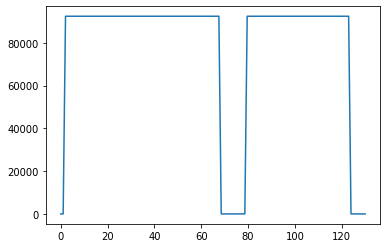

In [0]:
T = np.linspace(0,130,130)
plt.plot(T,mse[:130])

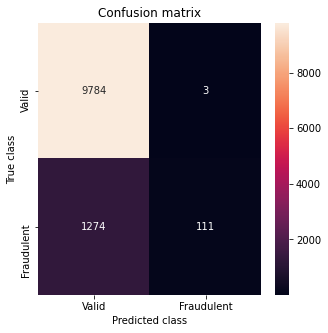

In [0]:
LABELS = ["Valid","Fraudulent"]

pred_y = [1 if e > 70 else 0 for e in error_df.Reconstruction_error.values]
#Using the mse values we classifie samples with high mse as fraudulent and samples with low mse as valid
conf_matrix = confusion_matrix(error_df.True_class, pred_y)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [0]:
print('f1_score = ', f1_score(error_df.True_class, pred_y))

f1_score =  0.14809873248832556


In [0]:
# calculate precision-recall curve

precision, recall, thresholds = precision_recall_curve(error_df.True_class, pred_y) 
pr_auc = auc(recall, precision)
print('PR-AUC', pr_auc)


PR-AUC 0.583931851288872


We got an f1_score = 15% and PR_AUC = 58% which is pretty good compared to the unsupervised machine learning approach. This shows the effeciency of the autoEncoders.

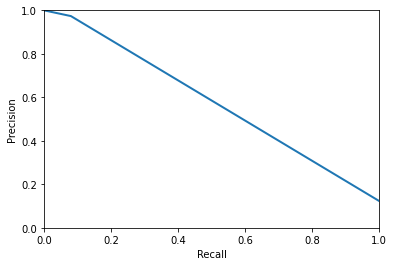

In [0]:
plot_PR_curve(error_df.True_class, pred_y)

The curve of the PR shows that the PR_AUC is over the 50% but it is pretty good.

###Adversarial AutoEncoder

In [0]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
train = StandardScaler().fit_transform(train)
train = pd.DataFrame(train)

In [0]:
encoder_net = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(X_train.shape[1], )),
        tf.keras.layers.Dense(64, activation="tanh"),
        tf.keras.layers.Dense(32, activation="tanh"),
        tf.keras.layers.Dense(16)
    ]
)

decoder_net = tf.keras.Sequential(
[       tf.keras.layers.Input(shape=(16, )),
        tf.keras.layers.Dense(32, activation="tanh"),
        tf.keras.layers.Dense(64, activation="tanh"),
        tf.keras.layers.Dense(X_train.shape[1], activation="linear")
    ]
)

inputs = tf.keras.Input(shape=(X_train.shape[1],))
outputs = tf.keras.layers.Dense(2, activation=tf.nn.sigmoid)(inputs)
model = tf.keras.Model(inputs=inputs, outputs=outputs)



In [0]:
!pip install alibi_detect

In [0]:
from alibi_detect.ad import AdversarialAE

ad = AdversarialAE(
    encoder_net=encoder_net,
    decoder_net=decoder_net,
    model=model,
    ae = autoencoder,
    threshold = 0.90)

In [0]:
ad.fit(X_train, epochs=10)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

326/326 [=] - 6s 19ms/step - loss: -7.5678e-05


In [0]:
ad.infer_threshold(X_test, threshold_perc=90, batch_size=64)

In [0]:
preds_detect = ad.predict(X_test, batch_size=64, return_instance_score=True)

In [0]:
print('f1_score = ', f1_score(preds_detect['data']['is_adversarial'], y_test))

f1_score =  0.14716781365802012


#Modeling with PyCaret

PyCaret is an open source, low-code machine learning library that allows you to go from preparing your data to deploying your model within seconds. It's fast and easy to use.

In [0]:
#install the library
!pip install pycaret

In [0]:
# join the data with target 
df = train.join(y, rsuffix='target')

In [0]:
df.head()

,client_catg,counter_statue_min,counter_statue_mean,counter_statue_median,counter_statue_max,counter_statue_std,counter_statue_var,counter_statue_sum,consommation_level_1_min,consommation_level_1_mean,consommation_level_1_median,consommation_level_1_max,consommation_level_1_std,cconsommation_level_1_var,consommation_level_1_sum,consommation_level_2_min,consommation_level_2_mean,consommation_level_2_median,cconsommation_level_2_max,consommation_level_2_std,consommation_level_2_var,consommation_level_2_sum,consommation_level_3_min,consommation_level_3_mean,consommation_level_3_median,consommation_level_3_max,consommation_level_3_std,consommation_level_3_var,consommation_level_3_sum,consommation_level_4_min,consommation_level_4_mean,consommation_level_4_median,consommation_level_4_max,consommation_level_4_std,consommation_level_4_var,consommation_level_4_sum,cmonths_number_min,months_number_mean,months_number_median,months_number_max,months_number_std,months_number_var,months_number_sum,counter_type_min,counter_type_mean,counter_type_median,counter_type_max,counter_type_std,counter_type_var,counter_type_sum,consumption_min,consumption_mean,consumption_median,consumption_max,consumption_std,consumption_var,consumption_sum,year_min,year_mean,year_median,year_max,year_std,year_var,year_sum,month_min,month_mean,month_median,month_max,month_std,month_var,month_sum,target
counter_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-1229176,11,0,0.000000,0.0,0,0.000000,0.000000,0,31,52.500000,51.0,106,11.054119,122.193548,1680,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0,0.0,0.0,0,4,4.125000,4.0,8,0.707107,0.500000,132,0,0.0,0.0,0,0.0,0.0,0,31,52.500000,51.0,106,11.054119,122.193548,1680,2008,2013.593750,2013.5,2019,3.271178,10.700605,64435,3,7.000000,7.0,11,3.369694,11.354839,224,0
.171032,11,0,0.026316,0.0,1,0.162221,0.026316,1,27,108.394737,105.5,185,33.434518,1117.866999,4119,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0,0.0,0.0,0,2,3.947368,4.0,4,0.324443,0.105263,150,1,1.0,1.0,1,0.0,0.0,38,27,108.394737,105.5,185,33.434518,1117.866999,4119,2007,2012.842105,2013.0,2019,3.709202,13.758179,76488,1,6.000000,6.0,12,3.479671,12.108108,228,0
.6849735,11,5,5.000000,5.0,5,0.000000,0.000000,5,0,0.000000,0.0,0,0.000000,0.000000,0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0,0.0,0.0,0,2,2.000000,2.0,2,0.000000,0.000000,2,1,1.0,1.0,1,0.0,0.0,1,0,0.000000,0.0,0,0.000000,0.000000,0,2007,2007.000000,2007.0,2007,0.000000,0.000000,2007,3,3.000000,3.0,3,0.000000,0.000000,3,0
.6849788,11,0,0.032258,0.0,1,0.179605,0.032258,1,0,176.709677,69.0,835,231.790594,53726.879570,5478,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0,0.0,0.0,0,2,4.000000,4.0,8,1.549193,2.400000,124,1,1.0,1.0,1,0.0,0.0,31,0,176.709677,69.0,835,231.790594,53726.879570,5478,2007,2012.064516,2012.0,2019,3.577108,12.795699,62374,1,4.806452,3.0,11,3.380526,11.427957,149,0
.6849788,11,0,0.032258,0.0,1,0.179605,0.032258,1,0,176.709677,69.0,835,231.790594,53726.879570,5478,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0,0.0,0.0,0,2,4.000000,4.0,8,1.549193,2.400000,124,1,1.0,1.0,1,0.0,0.0,31,0,176.709677,69.0,835,231.790594,53726.879570,5478,2007,2012.064516,2012.0,2019,3.577108,12.795699,62374,1,4.806452,3.0,11,3.380526,11.427957,149,0


In [0]:
#import classification module
from pycaret.classification import *
#intialize the setup
exp_clf = setup(df, target = 'target')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,2978
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(71500, 72)"
4,Missing Values,False
5,Numeric Features,63
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


We used default parameters of the setup function

In [0]:
#Compare Models
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.935700,0.946800,0.644900,0.902800,0.752200,0.716400
1,Light Gradient Boosting Machine,0.934100,0.946300,0.636900,0.898900,0.745300,0.708700
2,Extra Trees Classifier,0.930000,0.947300,0.620000,0.882600,0.728200,0.689400
3,Random Forest Classifier,0.925800,0.928400,0.581700,0.890500,0.703500,0.663200
4,Gradient Boosting Classifier,0.915800,0.921800,0.490600,0.912900,0.637900,0.595100
5,Extreme Gradient Boosting,0.915300,0.922400,0.477000,0.929100,0.630100,0.587800
6,Decision Tree Classifier,0.909100,0.827100,0.681500,0.707500,0.694000,0.640600
7,Ada Boost Classifier,0.908800,0.896600,0.452700,0.892200,0.600400,0.555100
8,Ridge Classifier,0.906400,0.000000,0.391800,0.975300,0.558800,0.517000
9,Linear Discriminant Analysis,0.906200,0.866700,0.404000,0.945100,0.565900,0.522700


After executing the compare_models function we noticed that the CatBoost Classifier is the best for the F1 score (0.75) and the Extra Trees Classifier has the best AUC score(0.947)

In [0]:
#Create Model
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9373,0.9364,0.6394,0.9219,0.7551,0.7204
1,0.9351,0.9409,0.6499,0.8913,0.7517,0.7154
2,0.9373,0.9508,0.6552,0.9035,0.7596,0.7245
3,0.9343,0.9541,0.6398,0.8965,0.7467,0.7102
4,0.9349,0.9463,0.6332,0.9091,0.7465,0.7105
5,0.9381,0.9480,0.6715,0.8930,0.7666,0.7317
6,0.9345,0.9517,0.6240,0.9167,0.7425,0.7065
7,0.9361,0.9476,0.6346,0.9179,0.7504,0.7151
8,0.9355,0.9454,0.6609,0.8836,0.7562,0.7199
9,0.9343,0.9472,0.6407,0.8948,0.7467,0.7101


In [0]:
#Tune Model
tuned_catboost = tune_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9387,0.9446,0.6671,0.9018,0.7669,0.7325
1,0.9375,0.9484,0.6975,0.8627,0.7714,0.7356
2,0.9371,0.9532,0.6909,0.8659,0.7686,0.7327
3,0.9407,0.9651,0.6821,0.9023,0.7769,0.7434
4,0.9363,0.9553,0.6728,0.8778,0.7618,0.7257
5,0.9405,0.9603,0.6979,0.8846,0.7802,0.7464
6,0.9353,0.9585,0.6544,0.8889,0.7538,0.7175
7,0.9425,0.9570,0.6887,0.9094,0.7838,0.7513
8,0.9391,0.9510,0.7018,0.8707,0.7772,0.7424
9,0.9404,0.9503,0.6988,0.8831,0.7802,0.7463


As we can see here, after tuning the model we see the improvement in both the F1 score and the AUC score

In [0]:
#generate predictions on hold-out set using trained model
catboost_predictions_holdout = predict_model(catboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.9394,0.9504,0.6671,0.9086,0.7693,0.7354


We see that validation score is pretty good for both metrics. And this proves that the model is efficient.

#Incremental Learning

Incremental learning is a machine learning paradigm where the learning process takes place whenever new example(s) emerge and adjusts what has been learned according to the new example(s).

In [0]:
#install the library
!pip install -U scikit-multiflow

In [0]:
from skmultiflow.trees import HoeffdingTree
from skmultiflow.data import DataStream
from tqdm import tqdm

Stream = DataStream(train, np.array(y))
Stream.prepare_for_use()

tree = HoeffdingTree(binary_split=False, grace_period=200, leaf_prediction='nba',
              max_byte_size=33554432, memory_estimate_period=1000000,
              nb_threshold=0, no_preprune=False, nominal_attributes=None,
              remove_poor_atts=False, split_confidence=1e-07,
              split_criterion='info_gain', stop_mem_management=False,
              tie_threshold=0.05)
y_pred = []
               
for i in tqdm(range(len(train))):
   X, Y = Stream.next_sample()       # get the next sample
   prediction = tree.predict(X)       # predict Y using the tree     
   y_pred.append(prediction) 
   
   tree.partial_fit(X, Y)   

100%|██████████| 52108/52108 [00:58<00:00, 884.25it/s]


In [0]:
print('Confusion Matrix\n', confusion_matrix(y, y_pred))  
print('F1-score', f1_score(y, y_pred)) 

Confusion Matrix
 [[45060   741]
 [  478  5829]]
F1-score 0.12702630879617327


Using the Incremental Learning, we got an f1_score around 13% which is not too bad.

#Conclusion

![picture](https://drive.google.com/uc?id=1ZUw8iNOs5Qh8xoR31nJndhAoBwXdHKco)